# Visualizing the Data Science Job Market

### Motivation for the Project

- Data Science is an emerging field with a reasonably high number of job opportunities. 

- Being graduate students majoring in Data science, we thought it would be helpful to understand the current Data Science Market.

- Having insights on which companies are hiring, experience requirement and salaries for each of the roles in data science would be useful. 

- Given the State of Job Market we are in, it would be helpful to know the exact skills which companies are looking for in a particular role.


### Data description

The data set used in our analysis has been obtained from Kaggle, which in turn has been obtained after scraping data from the job listing website, “Indeed”.

The data set has 660 rows and 13 columns, namely Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Headquarters, Size, Founded, Type of ownership, Industry, Sector, Revenue of the company. We plan on parsing different columns to gather meaningful insights.

### Importing the modules and reading the dataset

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
#df = pd.read_csv(r'C:\Users\Karthik Thammineni\EAS 503\Assignments\Project\DataScienceJobs.csv')
df = pd.read_csv(r'C:\Users\Balaji Bharadwaj\Downloads\Zia project\DataScienceJobs.csv')
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)


### Data Preprocessing

In order to create a database, we have decided to perform initial data preprocessing. Some of the steps include: <br>
- Dropping any unwanted columns <br>
- Remove text from Salary column <br>
- Extract Min, Max and Avg salary from Salary Estimate <br>
- Extract skills required from job descripiton <br>
- Extract Seniority required from Job Title <br>
- Extract Job State from Location <br>

In [3]:
 #Extracting salary figures and removing unnecessary text such as (Glassdoor est.)
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0]) 
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)


In [4]:
#replacing K and $ to change the salary into int values
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$','')) 
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)


In [5]:
#create new column min and max salary
df['Min_sal'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0])) 
df['Max_sal'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_sal,Max_sal
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171


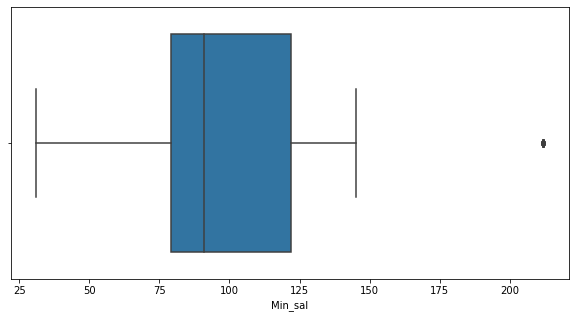

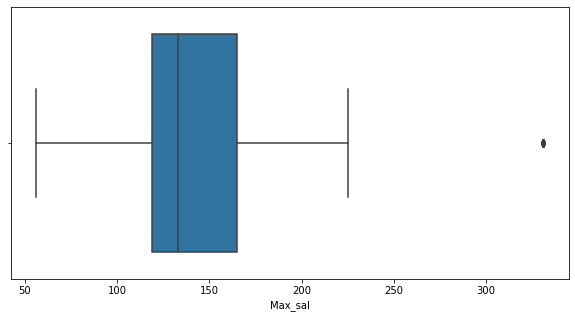

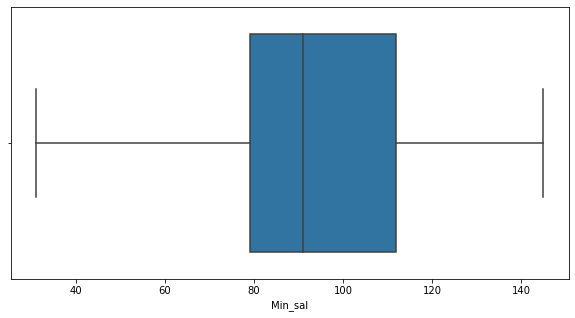

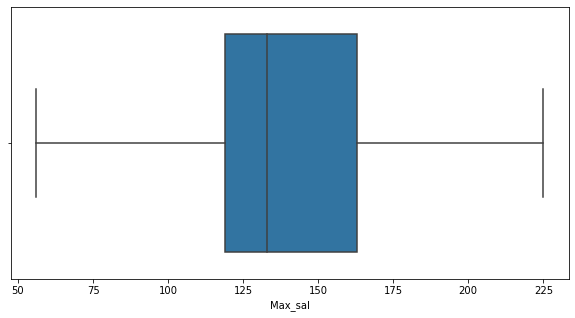

In [6]:
#identify outliers in min and max salary and average salary and replace them with the average of the column     
#plot boxplot to identify outliers in min and max salary and average salary     
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Min_sal'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Max_sal'])
plt.show()

#replace outliers in min and max salary and average salary with the average of the column
df['Min_sal'] = df['Min_sal'].apply(lambda x: df['Min_sal'].mean() if x>200 else x)
df['Max_sal'] = df['Max_sal'].apply(lambda x: df['Max_sal'].mean() if x>300 else x)

#plot boxplot to identify outliers in min and max salary and average salary
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Min_sal'])
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Max_sal'])
plt.show()

In [7]:
#Get average salary based on min and max salary
df['Avg_sal'] = (df.Min_sal+df.Max_sal)//2 
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_sal,Max_sal,Avg_sal
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0


In [8]:
#Checking if there are any -ve ratings for a company
df[df['Rating']==-1.0].shape 

(0, 16)

In [9]:
#replacing negative ratings with 0
df.Rating = np.where(df.Rating==-1.0,0,df.Rating)

In [10]:
#Creating a column Job_
df['Job_Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_sal,Max_sal,Avg_sal,Job_Location
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA


In [11]:
df[df['Founded']==-1].shape 

(111, 17)

In [12]:
#if founded year is not present, take it as current year
df.Founded = np.where(df.Founded==-1.0,2022,df.Founded) 
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_sal,Max_sal,Avg_sal,Job_Location
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA


In [13]:
#Finding the company age
df['Company_Age'] = df.Founded.apply(lambda x: x if x<1 else 2022-x)
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_sal,Max_sal,Avg_sal,Job_Location,Company_Age
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY,29
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA,54


In [14]:
#Searching for various skills in the job description and making columns for each of them
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['Hadoop'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['Bigdata'] = df['Job Description'].apply(lambda x: 1 if 'big data' in x.lower() else 0)
df['Java'] = df['Job Description'].apply(lambda x: 1 if 'java' in x.lower() else 0)
df['Sql'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['Azure'] = df['Job Description'].apply(lambda x: 1 if 'azure' in x.lower() else 0)
df['Aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['Julia'] = df['Job Description'].apply(lambda x: 1 if 'julia' in x.lower() else 0)
df['JavaScript'] = df['Job Description'].apply(lambda x: 1 if 'javaScript' in x.lower() else 0)
df['Go'] = df['Job Description'].apply(lambda x: 1 if 'Go' in x else 0)
df['MATLAB'] = df['Job Description'].apply(lambda x: 1 if 'matlab' in x.lower() else 0)
df['R'] = df['Job Description'].apply(lambda x: 1 if 'R' in x else 0)
df['SAS'] = df['Job Description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)
df['C'] = df['Job Description'].apply(lambda x: 1 if 'C' in x else 0)
df['C++'] = df['Job Description'].apply(lambda x: 1 if 'C++' in x else 0)
df['C#'] = df['Job Description'].apply(lambda x: 1 if 'C#' in x else 0)
df['Html'] = df['Job Description'].apply(lambda x: 1 if 'html' in x.lower() else 0)
df['Php'] = df['Job Description'].apply(lambda x: 1 if 'php' in x.lower() else 0)
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,JavaScript,Go,MATLAB,R,SAS,C,C++,C#,Html,Php
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,0,0,1,0,1,0,0,0,0
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,0,0,1,0,1,0,0,0,0


In [15]:
#Checking the various Job titles in the dataset
df['Job Title'].value_counts()

Data Scientist                                            333
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  14
Data Analyst                                               12
                                                         ... 
Business Data Analyst                                       1
Purification Scientist                                      1
Data Science Instructor                                     1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 168, dtype: int64

In [16]:
# Functions defining Job Category and Experience
def job_category(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'software engineer' in title.lower() or 'developer' in title.lower():
        return 'software engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def Experience(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower():
        return 'Senior'
    elif 'manager' in title.lower() or 'principal' in title.lower():
        return 'Manager'
    else:
        return 'Junior'


In [17]:
df['Job_role'] = df['Job Title'].apply(job_category)

df.Job_role.value_counts()

data scientist               447
na                            62
data analyst                  55
data engineer                 46
machine learning engineer     34
manager                        7
software engineer              6
director                       3
Name: Job_role, dtype: int64

In [18]:
df['Experience'] = df['Job Title'].apply(Experience)
df.Experience.value_counts()

Junior     562
Senior      82
Manager     16
Name: Experience, dtype: int64

In [19]:
#Jobs in each State
df.Job_Location.value_counts()

 CA              165
 VA               89
 MA               62
 NY               52
 MD               40
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 MO               12
 PA               12
United States     11
 CO               10
 NJ               10
 NC                9
 GA                9
 FL                8
 TN                8
 OK                6
 WI                6
 IN                5
 MI                5
 AZ                4
 AL                4
 MN                4
 CT                4
 UT                3
 NE                3
 IA                3
 OR                2
 SC                2
 RI                2
 NH                2
 LA                1
 MS                1
 KS                1
 DE                1
 WV                1
Name: Job_Location, dtype: int64

In [20]:
#Cleaning the Job Location Column
df = df[~((df['Job_Location']=='Remote') | (df['Job_Location']=='Utah') | (df['Job_Location']=='New Jersey') | (df['Job_Location']=='Texas') | (df['Job_Location']=='California'))]
df.Job_Location = df.Job_Location.apply(lambda x: x.replace('United States','US'))
df.Job_Location.value_counts()

 CA    165
 VA     89
 MA     62
 NY     52
 MD     40
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
 MO     12
 PA     12
US      11
 CO     10
 NJ     10
 NC      9
 GA      9
 FL      8
 TN      8
 OK      6
 WI      6
 IN      5
 MI      5
 AZ      4
 AL      4
 MN      4
 CT      4
 UT      3
 NE      3
 IA      3
 OR      2
 SC      2
 RI      2
 NH      2
 LA      1
 MS      1
 KS      1
 DE      1
 WV      1
Name: Job_Location, dtype: int64

In [21]:
#Displaying the final dataset 
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,MATLAB,R,SAS,C,C++,C#,Html,Php,Job_role,Experience
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,1,0,1,0,0,0,0,data scientist,Senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,1,0,1,0,0,0,0,data scientist,Junior


In [22]:
#Removing any blank spaces in the Dataset
df = df.apply(lambda x: x.strip() if isinstance(x,str) else x)

In [23]:
#Saving the Dataset as 'DataScience_Jobs_new.csv' which will be used to create the Database Schema
df.to_csv('DataScience_Jobs_new.csv', index=False)

### Database Creation and Schema

Using the 'DataScience_Jobs_new.csv' file, we have created a Database, "data_science_job_market.db" for the project.

In [24]:
# Initializing the required functions for creating the database and connection with it, tables and Executing SQl statements. 

from IPython.display import display, HTML
# import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

conn = create_connection('data_science_job_market.db', delete_db=False)

In [25]:
# Reading the csv file and storing it in dataframe df.
df = pd.read_csv("DataScience_Jobs_new.csv")
df = df.dropna()
#Printing all rows, just to show the total number of rows
df.head(1000)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,MATLAB,R,SAS,C,C++,C#,Html,Php,Job_role,Experience
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,1,0,1,0,0,0,0,data scientist,Senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,1,0,1,0,0,0,0,data scientist,Junior
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,0,1,0,1,1,0,0,0,data scientist,Junior
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,1,0,1,0,0,0,0,data scientist,Junior
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,1,1,1,0,0,0,0,data scientist,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,2022,Company - Private,...,0,1,0,1,0,0,0,0,data scientist,Junior
656,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,0.0,JKGT,"San Francisco, CA",-1,-1,2022,-1,...,0,1,0,1,0,0,0,0,data scientist,Junior
657,Data Scientist,105-167,Join a thriving company that is changing the w...,0.0,AccessHope,"Irwindale, CA",-1,-1,2022,-1,...,0,1,0,1,1,0,0,0,data scientist,Junior
658,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2010,Company - Private,...,0,1,0,1,0,0,0,0,data scientist,Junior


In [26]:
#creating the roles table
roles_table = "CREATE TABLE Roles(RoleId Integer not null primary key AUTOINCREMENT, RoleName TEXT NOT NULL)"
create_table(conn, roles_table,"Roles")

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
roles=[]
header=None
for line in x:
    if not header:
        header=1
        continue
    role=line[-2]
    if (role,) not in roles:
        roles.append((role,))
roles.sort()
print(roles)
with conn:
        conn.cursor().executemany("insert into Roles(RoleName) values(?)",roles)
    

[('data analyst',), ('data engineer',), ('data scientist',), ('director',), ('machine learning engineer',), ('manager',), ('na',), ('software engineer',)]


In [27]:
#creating the industries table

industries_table = "CREATE TABLE Industries (IndustryId Integer not null primary key AUTOINCREMENT, IndustryName Text not null)"
create_table(conn, industries_table, drop_table_name='Industries')

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
industries=[]
header=None
for line in x:
    if not header:
        header=1
        continue
    industry=line[10]
    if industry=="-1":
        continue
    if (industry,) not in industries:
        industries.append((industry,))
industries.sort()
industries.append(("-1",))
print(industries)
with conn:
        conn.cursor().executemany("insert into Industries(IndustryName) values(?)",industries)

[('Accounting',), ('Advertising & Marketing',), ('Aerospace & Defense',), ('Architectural & Engineering Services',), ('Banks & Credit Unions',), ('Biotech & Pharmaceuticals',), ('Cable, Internet & Telephone Providers',), ('Chemical Manufacturing',), ('Colleges & Universities',), ('Computer Hardware & Software',), ('Construction',), ('Consulting',), ('Consumer Electronics & Appliances Stores',), ('Consumer Products Manufacturing',), ('Department, Clothing, & Shoe Stores',), ('Electrical & Electronic Manufacturing',), ('Energy',), ('Enterprise Software & Network Solutions',), ('Express Delivery Services',), ('Farm Support Services',), ('Federal Agencies',), ('Financial Transaction Processing',), ('Food & Beverage Manufacturing',), ('Food & Beverage Stores',), ('Health Care Services & Hospitals',), ('Health, Beauty, & Fitness',), ('Hotels, Motels, & Resorts',), ('IT Services',), ('Industrial Manufacturing',), ('Insurance Agencies & Brokerages',), ('Insurance Carriers',), ('Internet',), ('

In [28]:
#creating the company owner ship table

CompanyOwnerShip_table = "CREATE TABLE CompanyOwnerShip (OwnerShipId Integer not null primary key AUTOINCREMENT, OwnerShipType Text not null)"
create_table(conn, CompanyOwnerShip_table, drop_table_name='CompanyOwnerShip')

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
CompanyOwnerShips=[]
header=None
for line in x:
    if not header:
        header=1
        continue
    CompanyOwnerShip=line[9]
    if CompanyOwnerShip=="-1":
        continue
    if (CompanyOwnerShip,) not in CompanyOwnerShips:
        CompanyOwnerShips.append((CompanyOwnerShip,))
CompanyOwnerShips.sort()
CompanyOwnerShips.append(("-1",))
print(CompanyOwnerShips)
with conn:
        conn.cursor().executemany("insert into CompanyOwnerShip(OwnerShipType) values(?)",CompanyOwnerShips)

[('College / University',), ('Company - Private',), ('Company - Public',), ('Contract',), ('Government',), ('Hospital',), ('Nonprofit Organization',), ('Other Organization',), ('Private Practice / Firm',), ('Self-employed',), ('Subsidiary or Business Segment',), ('Unknown',), ('-1',)]


In [29]:
#creating the sectors table

Sectors_table = "CREATE TABLE Sectors (SectorId Integer not null primary key AUTOINCREMENT, SectorName Text not null)"
create_table(conn, Sectors_table, drop_table_name='Sectors')

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
Sectors=[]
header=None
for line in x:
    if not header:
        header=1
        continue
    Sector=line[11]
    if Sector=="-1":
        continue
    if (Sector,) not in Sectors:
        Sectors.append((Sector,))
Sectors.sort()
Sectors.append(("-1",))
print(Sectors)
with conn:
        conn.cursor().executemany("insert into Sectors(SectorName) values(?)",Sectors)

[('Accounting & Legal',), ('Aerospace & Defense',), ('Agriculture & Forestry',), ('Biotech & Pharmaceuticals',), ('Business Services',), ('Construction, Repair & Maintenance',), ('Consumer Services',), ('Education',), ('Finance',), ('Government',), ('Health Care',), ('Information Technology',), ('Insurance',), ('Manufacturing',), ('Media',), ('Non-Profit',), ('Oil, Gas, Energy & Utilities',), ('Real Estate',), ('Retail',), ('Telecommunications',), ('Transportation & Logistics',), ('Travel & Tourism',), ('-1',)]


In [30]:
#creating the skills table

Skills_table = "CREATE TABLE Skills (SkillId Integer not null primary key AUTOINCREMENT, SkillName Text not null)"
create_table(conn, Skills_table, drop_table_name='Skills')

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
skills=[]
header=None
for line in x:
    for num in range(18,39):
        skills.append((line[num].capitalize(),))
    break

skills.sort()
print(skills)
with conn:
        conn.cursor().executemany("insert into Skills(SkillName) values(?)",skills)

[('Aws',), ('Azure',), ('Bigdata',), ('C',), ('C#',), ('C++',), ('Excel',), ('Go',), ('Hadoop',), ('Html',), ('Java',), ('Javascript',), ('Julia',), ('Matlab',), ('Php',), ('Python',), ('R',), ('Sas',), ('Spark',), ('Sql',), ('Tableau',)]


In [31]:
# Defining Various Dictionaries to use them in as Foreign Keys 

def roles_to_roles_id(normalized_database_filename):
    sql_statement="Select Roleid,Rolename From Roles"
    norm_conn=create_connection(normalized_database_filename)
    a=execute_sql_statement(sql_statement,norm_conn)
    dictionary={}
    for i in a:
        dictionary[i[1]]=i[0]
    return dictionary

def industry_to_industry_id(normalized_database_filename):
    sql_statement="Select Industryid,Industryname From Industries"
    norm_conn=create_connection(normalized_database_filename)
    a=execute_sql_statement(sql_statement,norm_conn)
    dictionary={}
    for i in a:
        dictionary[i[1]]=i[0]
    return dictionary

def CompanyOwnerShip_to_CompanyOwnerShip_id(normalized_database_filename):
    sql_statement="Select OwnerShipid,OwnerShiptype From CompanyOwnerShip"
    norm_conn=create_connection(normalized_database_filename)
    a=execute_sql_statement(sql_statement,norm_conn)
    dictionary={}
    for i in a:
        dictionary[i[1]]=i[0]
    return dictionary

def sector_to_sector_id(normalized_database_filename):
    sql_statement="Select Sectorid,SectorName From Sectors"
    norm_conn=create_connection(normalized_database_filename)
    a=execute_sql_statement(sql_statement,norm_conn)
    dictionary={}
    for i in a:
        dictionary[i[1]]=i[0]
    return dictionary

def skills_to_skills_id(normalized_database_filename):
    sql_statement="Select SkillId,SkillName From Skills"
    norm_conn=create_connection(normalized_database_filename)
    a=execute_sql_statement(sql_statement,norm_conn)
    dictionary={}
    for i in a:
        dictionary[i[1]]=i[0]
    return dictionary

In [32]:
# Defining the Companies Table

Companies_table = """CREATE TABLE Companies (CompanyId Integer not null primary key AUTOINCREMENT, 
    CompanyName Text not null, Location Text not null, 
    HeadQuarters Text not null, IndustryId Integer not null, 
    OwnerShipId Integer not null, SectorId Integer not null,
    FOREIGN KEY (IndustryId) REFERENCES Industries(IndustryId),
    FOREIGN KEY (OwnerShipId) REFERENCES CompanyOwnerShip(OwnerShipId),
    FOREIGN KEY (SectorId) REFERENCES Sectors(SectorId));"""
create_table(conn, Companies_table, drop_table_name='Companies')

In [33]:
#Populating the Companies Table

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
data=[]
dic_industry=industry_to_industry_id('data_science_job_market.db')
dic_ownership=CompanyOwnerShip_to_CompanyOwnerShip_id('data_science_job_market.db')
dic_sector=sector_to_sector_id('data_science_job_market.db')
header=None
for line in x:
    if not header:
        header=1
        continue
    company=line[4]
    location=line[16]
    headquarters=line[6]
    industry_id=dic_industry[line[10]]
    owner_id=dic_ownership[line[9]]
    sector_id=dic_sector[line[11]]
    if (company,location,headquarters,industry_id,owner_id,sector_id) not in data:
        data.append((company,location,headquarters,industry_id,owner_id,sector_id))
        
data.sort()
with conn:
    conn.cursor().executemany("insert into Companies(CompanyName,Location,HeadQuarters,IndustryId,OwnerShipId,SectorId) values(?,?,?,?,?,?)",data)

In [34]:
# Creating the Company Id dictionary to map into the Company Details Table and the Job Details Table
def company_to_company_id(normalized_database_filename):
    sql_statement="Select CompanyId,CompanyName From Companies"
    norm_conn=create_connection(normalized_database_filename)
    a=execute_sql_statement(sql_statement,norm_conn)
    dictionary={}
    for i in a:
        dictionary[i[1]]=i[0]
    return dictionary

# print(company_to_company_id('data_science_job_market.db'))

In [35]:
# Defining the Schema of the CompanyDetails Table
CompanyDetails_table = """CREATE TABLE CompanyDetails (CompanyDetailsId Integer not null primary key AUTOINCREMENT, 
    CompanyId Integer not null, Size Text not null, Founded Integer not null,
    Rating Real  not null, Revenue Text not null, Age Integer not null,
    FOREIGN KEY (CompanyId) REFERENCES Companies(CompanyId))"""
create_table(conn, CompanyDetails_table, drop_table_name='CompanyDetails')

In [36]:
#Populating the CompanyDetails Table

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
data=[]
dic_company=company_to_company_id('data_science_job_market.db')
header=None
for line in x:
    if not header:
        header=1
        continue
    companyid=dic_company[line[4]]
    size=line[7]
    founded = line[8]
    rating=line[3]
    revenue=line[12]
    age=line[17]
    if (companyid,size,founded,rating,revenue,age) not in data:
        data.append((companyid,size,founded,rating,revenue,age))
        
data.sort()
with conn:
    conn.cursor().executemany("insert into CompanyDetails(CompanyId, Size, Founded, Rating, Revenue, Age) values(?,?,?,?,?,?)",data)

In [37]:
#Defining the Schema of the Main Data Science Jobs Table

DataScienceJobs_table ="""CREATE TABLE DataScienceJobs (JobId Integer not null primary key AUTOINCREMENT, RoleId Integer not null, JobDescription Text not null, 
    SalaryEst Text not null, Min_Sal Integer not null, Max_Sal Integer not null, Avg_Sal Integer not null, CompanyId Integer not null, JobState Text not null, JobRole Text not null, Seniority Text not null, Skill_Ids Text not null,
    
    FOREIGN KEY (RoleId) REFERENCES Roles(RoleId),
    FOREIGN KEY (CompanyId) REFERENCES Companies(CompanyId))"""
create_table(conn, DataScienceJobs_table, 'DataScienceJobs')

In [38]:
#Populating the Jobs Table

import csv
o = open("DataScience_Jobs_new.csv",'r', errors="ignore")
x = csv.reader(o)
data=[]
dic_company=company_to_company_id('data_science_job_market.db')
dict_roles = roles_to_roles_id('data_science_job_market.db')
dict_skills = skills_to_skills_id('data_science_job_market.db')
skills = df.columns.values[18:39]
header=None
for line in x:
    if not header:
        header=1
        continue
    matlab=0
    sas=0
    companyid=dic_company[line[4]]
    roleid = dict_roles[line[39]]
    description = line[2]
    salary = line[1]
    min_sal = line[13]
    max_sal = line[14]
    avg_sal = line[15]
    job_state = line[16]
    job_role = line[39]
    seniority = line[40]
    job_skills = line[18:39]
    skillset = dict(zip(skills, job_skills))
    skill = [k for k,v in skillset.items() if v == '1']
    if "MATLAB" in skill:
        matlab=14
        skill.remove("MATLAB")
    if "SAS" in skill:
        sas=18
        skill.remove("SAS")
    skillids =  ','.join([str(dict_skills[i]) for i in skill])
    if matlab==14:
        skillids+=",14"
    if sas==18:
        skillids+=",18"
    data.append((roleid,description,salary,min_sal,max_sal,avg_sal,companyid,job_state,job_role,seniority,skillids))

with conn:
    conn.cursor().executemany("insert into DataScienceJobs(RoleId, JobDescription, SalaryEst, Min_Sal, Max_Sal, Avg_Sal, CompanyId, JobState, JobRole, Seniority, Skill_Ids) values(?,?,?,?,?,?,?,?,?,?,?)",data)

### Data Visualization

In this step we pull Data from the aforementioned Database using SQL statements to answer questions such as:

- What does a Data Scientist, Data Analyst and Data Engineer exactly do?
- What are the states in which a majority of jobs are being posted?
- What are the states in which in a majority of companies are present?
- What are the minimum, maximum and average salaries for different roles?
- How are salaries for each role distributed?
- What are the average salaries in different states? 
- What are the companies with the most jobs posted?
- What are the companies looking for Data Scientists, Data Analysts and Data Engineers?
- What are the top sectors and industries which have the most job openings?
- Which Company Owner Ship categories are hiring the most?
- How many junior, senior and manager roles are available?
- What are the various skills that are being asked by companies for Data scientists, Data Analysts and Data Engineers?

In [39]:
#Importing the required libraries

import plotly.graph_objects as go
import matplotlib.pyplot as plt

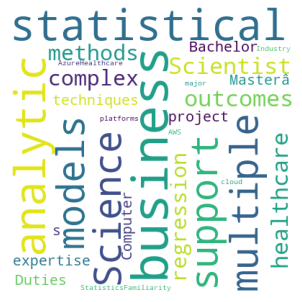

Data Scientist


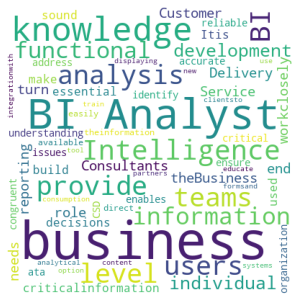

Data Analyst


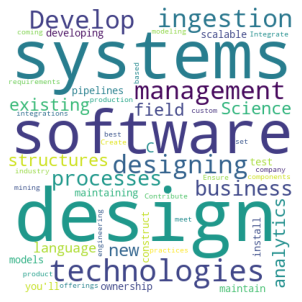

Data Engineer


In [40]:
#Understanding what a data scientist does 

jd = execute_sql_statement("Select JobDescription from DataScienceJobs where jobrole = 'data scientist'",conn)
jd=jd[0]
jd=jd[0]
jd=jd.split("\n")
b=[]
for i in jd:
    if i=="":
        continue
    if "â€¢" in i:
        i=i[4:]
        b.append(i)
    else:
        b.append(i)
b=b[1:25]
a=""
for i in b:
    a+=i

import sklearn
from sklearn.feature_extraction import text
extra_stopword = ["â","qualifications",'n','data',"degree","DegreePreferred",'experience','work','team','will','skill','year','skills']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stop_words,width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(a)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
print("Data Scientist" )


#Understanding what a data analyst does

jd = execute_sql_statement("Select JobDescription from DataScienceJobs where jobrole = 'data analyst'",conn)
jd=jd[1]
jd=jd[0]
jd=jd.split("\n")
b=[]
for i in jd:
    if i=="":
        continue
    if "â" in i or "€" in i or "¢" in i:
        i.replace("â","")
        i.replace("€","")
        i.replace("¢","")
        b.append(i)
    else:
        b.append(i)
b=b[1:25]
a=""
for i in b:
    a+=i

import sklearn
from sklearn.feature_extraction import text
extra_stopword = ["â","qualifications",'n','data',"degree","DegreePreferred",'experience','work','team','will','skill','year','skills']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stop_words,width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(a)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

print("Data Analyst")

#Understanding what a data engineer does

jd = execute_sql_statement("Select JobDescription from DataScienceJobs where jobrole = 'data engineer'",conn)
jd=jd[0]
jd=jd[0]
jd=jd.split("\n")
b=[]
for i in jd:
    if i=="":
        continue
    if "â€¢" in i:
        i=i[4:]
        b.append(i)
    else:
        b.append(i)
b=b[3:22]
a=""
for i in b:
    a+=i

import sklearn
from sklearn.feature_extraction import text
extra_stopword = ["â","qualifications",'n','data',"degree","DegreePreferred",'experience','work','team','will','skill','year','skills']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stop_words,width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(a)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

print("Data Engineer")

Thus, the job descriptions for each of the roles can be interpreted as follows:

- A Data Scientist will be making complex analytical and statistical models in order to support the business.
- A Data Analyst will be using business intelligence tools and makes critical decisions which would help the business.
- A Data Engineer would be designing software, develops and maintains data pipelines.

In [42]:
#plotting a treemap graph to find the states with the most number of jobs

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

job_count =  execute_sql_statement("Select JobState, count(JobState) as Num_Jobs from DatascienceJobs group by JobState order by Num_Jobs desc limit 10",conn)

df1 = pd.read_sql_query("Select JobState, count(JobState) as Num_Jobs from DatascienceJobs group by JobState order by Num_Jobs desc limit 10",conn)
States = []
Jobs = []

for i in job_count:
    States.append(i[0])
    Jobs.append(i[1])
    

fig = px.treemap(df1,path=["JobState","Num_Jobs"],values="Num_Jobs")    
fig.update_layout(title_text='Top 10 States with the Most Jobs Posted')
fig.show()

C:\Users\Balaji Bharadwaj\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Balaji Bharadwaj\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



California, Virgina, Massachusetts and New York are the states with the most number of jobs posted.

In [43]:
#Top 10 States with the maximum number of companies   
companies = execute_sql_statement("Select JobState, count(CompanyId) as Num_Companies from DatascienceJobs group by JobState order by Num_Companies desc limit 10",conn) 
#bar graph for the number of companies in each state
States = []
Companies = []
for i in companies:
    States.append(i[0])
    Companies.append(i[1])
#plotting the bar graph for the top states with the maximum number of jobs
fig = go.Figure(data=[go.Bar(x=States, y=Companies)])
fig.update_layout(title_text='Number of Companies in each State')
fig.show()
    

California, Virgina, Massachusetts and New York are the states where the most number of companies are present.

In [44]:
#usa map to show the avg salary in each state

companies = execute_sql_statement("Select JobState, avg(Avg_Sal) as Avg_Salary from DataScienceJobs group by JobState",conn)    
jobState = []
Avg_Salary = []
for i in companies:
    jobState.append(i[0].strip())
    Avg_Salary.append(i[1])

fig = px.choropleth(locations=jobState, locationmode="USA-states", color=Avg_Salary, scope="usa", color_continuous_scale=["yellow", "green", "orange"])
fig.add_scattergeo(
    locations=jobState,    ###codes for states,
    locationmode='USA-states',
    text=jobState,
    mode='text')
fig.update_layout(title_text='Average Salary in each state')
fig.show()

Wisconsin, Iowa and Arizona are the states with the highest average salaries for the data science jobs. This is most likely due to not enough data / skewed data.

In [45]:
#box plot of average salary for each role
avg_sal = execute_sql_statement("Select JobRole, Avg_Sal from DatascienceJobs order by Avg_Sal desc",conn)  
Roles = []
Avg_Sal = []
for i in avg_sal:
    if i[0]=="na":
        Roles.append("Others")
        Avg_Sal.append(i[1])
        continue
    Roles.append(i[0].capitalize())
    Avg_Sal.append(i[1])
#plotting the box plot for the average salary for each role
fig = go.Figure(data=[go.Box(y=Avg_Sal, x=Roles)])
fig.update_layout(title_text='Average Salary for each Role')
fig.show()
    

Data scientist and directors have the highest average salaries, closely followed by managers, software engineers and data engineers 

In [46]:
#max, min and average salary for each role
max_sal = execute_sql_statement("Select JobRole, max(Max_Sal) as Max_Sal from DatascienceJobs group by JobRole order by Max_Sal desc",conn)
min_sal = execute_sql_statement("Select JobRole, min(min_Sal) as Min_Sal from DatascienceJobs group by JobRole order by Min_Sal desc",conn)
avg_sal = execute_sql_statement("Select JobRole, avg(Avg_Sal) as Avg_Sal from DatascienceJobs group by JobRole order by Avg_Sal desc",conn)
#bar graph for the max and min salary for each role
Roles = []
Max_Sal = []
Min_Sal = []
Avg_Sal = []
for i in max_sal:
    if i[0]=="na":
        continue
    Roles.append(i[0].capitalize())
    Max_Sal.append(i[1])
for i in min_sal:
    if i[0]=="na":
        continue
    Min_Sal.append(i[1])
for i in avg_sal:
    if i[0]=="na":
        continue
    Avg_Sal.append(i[1])
#plotting the bar graph max, min, and average salary for each role
fig = go.Figure(data=[go.Bar(x=Roles, y=Max_Sal, name='Max_Sal'), go.Bar(x=Roles, y=Min_Sal, name='Min_Sal'), go.Bar(x=Roles, y=Avg_Sal, name='Avg_Sal')])
fig.update_layout(title_text='Max, Min and Average Salary for each Role')
fig.show()

#salary vs job title
companies = execute_sql_statement("Select d.JobRole, d.Avg_Sal from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId",conn)
JobRole = []
Salary = []
for i in companies:
    if i[0]=="na":
        continue
    JobRole.append(i[0].capitalize())
    Salary.append(i[1])
#plotting the scatter plot for the salary vs job title
fig = go.Figure(data=go.Scatter(x=JobRole, y=Salary, mode='markers'))
fig.update_layout(title_text='Salary vs Job Title')
fig.show()




In [47]:
#top 10 companies with the highest number of jobs posted    
"""
companies = execute_sql_statement("Select c.CompanyName, count(d.CompanyId) as Num_Jobs from DatascienceJobs d inner join Companies c on d.CompanyId = c.CompanyId  group by CompanyName order by Num_Jobs desc LIMIT 10;",conn)
Companies = []
Num_Jobs = []
for i in companies:
    Companies.append(i[0])
    Num_Jobs.append(i[1])
#plotting the bar graph for the number of jobs posted in each state
fig = go.Figure(data=[go.Bar(x=Companies, y=Num_Jobs)]) 
fig.update_layout(title_text='Top 10 Companies with the highest number of jobs posted')
fig.show()
"""
import plotly.express as px
df1=pd.read_sql("Select c.CompanyName, count(d.CompanyId) as Num_Jobs from DatascienceJobs d inner join Companies c on d.CompanyId = c.CompanyId  group by CompanyName order by Num_Jobs desc LIMIT 10;",conn)
fig=px.bar(df1,x="CompanyName",y="Num_Jobs",color="CompanyName", title="Top 10 Companies with the highest number of jobs posted",template="ggplot2")
fig.show()

In [48]:
#companies with the most data scientists roles  
companies = execute_sql_statement("Select c.CompanyName, count(d.CompanyId) as jobs from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId where d.JobRole like '%scientist%' group by d.CompanyId order by jobs desc limit 20",conn)
Companies = []
Jobs = []
for i in companies:
    Companies.append(i[0])
    Jobs.append(i[1])
#plotting the bar graph for the companies with the most data scientists roles  
fig = go.Figure(data=[go.Bar(x=Companies, y=Jobs)])
fig.update_layout(title_text='Companies looking for Data Scientists')
fig.show()

#companies with the most data analyst roles  
companies = execute_sql_statement("Select c.CompanyName, count(d.CompanyId) as jobs from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId where d.JobRole like '%analyst%' group by d.CompanyId order by jobs desc limit 20",conn)    
Companies = []
Jobs = []
for i in companies:
    Companies.append(i[0])
    Jobs.append(i[1])
#plotting the bar graph for the number of jobs posted in each company looking for data analysts
fig = go.Figure(data=[go.Bar(x=Companies, y=Jobs)])
fig.update_layout(title_text='Companies looking for Data Analysts')
fig.show()

#companies with the most data engineer roles 
companies = execute_sql_statement("Select c.CompanyName, count(d.CompanyId) as jobs from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId where d.JobRole like '%engineer%' group by d.CompanyId order by jobs desc limit 20",conn)    
Companies = []
Jobs = []   
for i in companies:
    Companies.append(i[0])
    Jobs.append(i[1])

#plotting the bar graph for the companies with the most data engineer roles 
fig = go.Figure(data=[go.Bar(x=Companies, y=Jobs)])
fig.update_layout(title_text='Companies looking for Data Engineers')
fig.show()


In [49]:
#Sectors with the most jobs    
companies = execute_sql_statement("Select s.SectorName, count(d.CompanyId) as jobs from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId inner join Sectors s on c.SectorId = s.SectorId group by c.SectorId order by jobs desc limit 13",conn)   
Sector = []
Jobs = []
for i in companies:
    if i[0]=="-1":
        continue
    Sector.append(i[0])
    Jobs.append(i[1])
#plotting the bar graph for Sectors with the most jobs  
fig = go.Figure(data=[go.Bar(x=Sector, y=Jobs)])
fig.update_layout(title_text='Jobs in each Sector')
fig.show()


In [50]:
#Industries with the most number of jobs
companies = execute_sql_statement("Select i.IndustryName, count(d.CompanyId) as jobs from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId inner join Industries i on c.IndustryId = i.IndustryId group by c.IndustryId order by jobs desc limit 15",conn)
Industry = []
Jobs = []
for i in companies:
    if i[0]=="-1":
        continue
    Industry.append(i[0])
    Jobs.append(i[1])
#plotting the bar graph for the Industries with the most number of jobs
"""
fig = go.Figure(data=[go.Bar(x=Industry, y=Jobs)])
fig.update_layout(title_text='Jobs in each Industry')
fig.show()
"""
fig = go.Figure(data=[go.Scatter(x=Industry, y=Jobs, mode='markers', marker=dict(size=Jobs))])
fig.update_layout(title_text='Industries with the most number of jobs')
fig.show()


In [51]:
#jobs in each companyownership  
companies = execute_sql_statement("Select co.OwnershipType, count(d.CompanyId) as jobs from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId inner join CompanyOwnership co on c.OwnershipId = co.OwnershipId group by c.OwnershipId order by jobs desc limit 4",conn)

CompanyOwnership = []
Jobs = []
for i in companies:
    if i[0]=="-1":
        continue 
    CompanyOwnership.append(i[0])
    Jobs.append(i[1])
#plotting the bar graph for the number of jobs posted in each companyownership
fig = go.Figure(data=[go.Bar(x=CompanyOwnership, y=Jobs)])
fig.update_layout(title_text='Jobs in each Company Ownership')
fig.show()

In [52]:
#jobs as per seniority
companies = execute_sql_statement("Select Seniority, count(d.CompanyId) as jobs from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId group by d.Seniority order by jobs desc",conn)
Seniority = []
Jobs = []
for i in companies:
    Seniority.append(i[0])
    Jobs.append(i[1])
#plotting the bar graph for the number of jobs posted as per seniority
fig = go.Figure(data=[go.Bar(x=Seniority, y=Jobs)])
fig.update_layout(title_text='Jobs as per Seniority')
fig.show()



In [53]:
#top skills that are being asked by the companies for a data scientist.

companies = execute_sql_statement("Select d.Skill_Ids from DataScienceJobs d  where jobrole = 'data scientist'",conn)
skills = {}
for i in companies:
    i=i[0]
    if i=="":
        continue
    b=i.split(",")
    for j in b:
        if j not in skills:
            skills[j]=1
        else:
            skills[j]+=1
skills_map={}
a=skills_to_skills_id("data_science_job_market.db")
b={}
for i in a:
    if a[i] not in b:
        b[a[i]]=i
c={}
for i in skills:
    if int(i) in b:
        c[b[int(i)]]=skills[i]
sorted_c = dict(sorted(c.items(), key = lambda x: x[1], reverse = True))

skill=[]
count=[]
for i in sorted_c:
    if i=="C":
        continue
    skill.append(i)
    count.append(sorted_c[i])

skill=skill[:10]
count=count[:10]

fig = go.Figure(data=[go.Bar(x=skill, y=count)])
fig.update_layout(title_text='In Demand Skills required for Data Scientist')
fig.show()

In [54]:
#top skills that are being asked by the companies for a data analyst.

companies = execute_sql_statement("Select d.Skill_Ids from DataScienceJobs d  where jobrole = 'data analyst'",conn)
skills = {}
for i in companies:
    i=i[0]
    if i=="":
        continue
    b=i.split(",")
    for j in b:
        if j not in skills:
            skills[j]=1
        else:
            skills[j]+=1
skills_map={}
a=skills_to_skills_id("data_science_job_market.db")
b={}
for i in a:
    if a[i] not in b:
        b[a[i]]=i
c={}
for i in skills:
    if int(i) in b:
        c[b[int(i)]]=skills[i]
sorted_c = dict(sorted(c.items(), key = lambda x: x[1], reverse = True))

skill=[]
count=[]
for i in sorted_c:
    if i=="C":
        continue
    skill.append(i)
    count.append(sorted_c[i])

skill=skill[:10]
count=count[:10]

fig = go.Figure(data=[go.Bar(x=skill, y=count)])
fig.update_layout(title_text='In Demand Skills required for Data Analyst')
fig.show()

In [55]:
#top skills that are being asked by the companies for a data engineer.

companies = execute_sql_statement("Select d.Skill_Ids from DataScienceJobs d  where jobrole = 'data engineer'",conn)
skills = {}
for i in companies:
    i=i[0]
    if i=="":
        continue
    b=i.split(",")
    for j in b:
        if j not in skills:
            skills[j]=1
        else:
            skills[j]+=1
skills_map={}
a=skills_to_skills_id("data_science_job_market.db")
b={}
for i in a:
    if a[i] not in b:
        b[a[i]]=i
c={}
for i in skills:
    if int(i) in b:
        c[b[int(i)]]=skills[i]
sorted_c = dict(sorted(c.items(), key = lambda x: x[1], reverse = True))

skill=[]
count=[]
for i in sorted_c:
    if i=="C":
        continue
    skill.append(i)
    count.append(sorted_c[i])

skill=skill[:10]
count=count[:10]

fig = go.Figure(data=[go.Bar(x=skill, y=count)])
fig.update_layout(title_text='In Demand Skills required for Data Engineer')
fig.show()

In [56]:
#plot for avg salary and company age
companies = execute_sql_statement("Select c.CompanyName, Avg_Sal, cd.Age from DatascienceJobs d inner join Companies c on d.CompanyId = c.CompanyId inner join CompanyDetails cd on c.CompanyId = cd.CompanyId group by CompanyName order by Avg_Sal desc limit 50;",conn)
Companies = []
Avg_Sal = []
CompanyAge = []
for i in companies:
    Companies.append(i[0])
    Avg_Sal.append(i[1])
    CompanyAge.append(i[2])
#plotting the bar graph for the number of jobs posted in each state
fig = go.Figure(data=[go.Bar(x=Companies, y=Avg_Sal, name='Avg_Sal'), go.Bar(x=Companies, y=CompanyAge, name='CompanyAge')])
fig.update_layout(title_text='Avg Salary and Company Age')
fig.show()

We can see that the average salary does not correlate with the age of the company.

In [57]:
#salary vs job title vs company ownership
companies = execute_sql_statement("Select d.JobRole, d.Avg_Sal, co.OwnershipType from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId inner join CompanyOwnerShip co on co.OwnerShipId = c.OwnerShipId",conn)
JobRole = []
Salary = []
CompanyOwnership = []
for i in companies:
    JobRole.append(i[0])
    Salary.append(i[1])
    CompanyOwnership.append(i[2])
#plotting the 3D chart for the salary vs job title vs company ownership
fig = go.Figure(data=[go.Scatter3d(x=JobRole, y=Salary, z=CompanyOwnership, mode='markers')])
fig.update_layout(title_text='Salary vs Job Title vs Company Ownership')
fig.show()

In [58]:
#salary vs seniority

companies = execute_sql_statement("Select d.Seniority, d.Avg_Sal from DataScienceJobs d inner join Companies c on d.CompanyId = c.CompanyId",conn)
Seniority = []
Salary = []
for i in companies:
    Seniority.append(i[0])
    Salary.append(i[1])
#plotting the scatter plot for the salary vs seniority
fig = go.Figure(data=go.Scatter(x=Seniority, y=Salary, mode='markers'))
fig.update_layout(title_text='Salary vs Seniority')
fig.show()

### Conclusion

The following conclusions have been made from our analysis:

- California, Virgina, Massachusetts and New York are the States with the most number of Data Science jobs along with the most number of companies that are hiring.
- Data Scientists, and Directors command the highest salaries among all the jobs in Data Science.
- Maxar Technologies, Hatch Data and Tempus Labs are the companies which have the most number of job openings.
- Information Technology and Business are the sectors which have the most number of job openings.
- Biotech and IT are the industries with the most number of job openings.
- Private and Public companies have the most number of job openings when considering ownership type.
- There are more number of junior level roles than senior or managerial roles.
- R, SQL, Python and Excel are the main skills for various roles in Data Science.

## Future Scope

- Job Vacancy Prediction
- Job Salary Prediction